<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/Ex_1_Polydoros_Akritidis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex1. Logistic Regression

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# Load Dataset to DataFrame

In [ ]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Convert DataFrame to x (inputs), y (targets) arrays

In [ ]:
input_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target_column = "Outcome"

x = df[input_columns].to_numpy()
y = df[target_column].to_numpy()

#Summary check

In [ ]:
df.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From here we can extract valuable insights for the dataset, including that there are no missing values to handle.

# Split Dataset to Train-Test

In [ ]:
random_state = 0
test_ratio = 0.3

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size = test_ratio)

# Create a Logistic Regression Model

In [ ]:
regularization = "l2"


classifier = LogisticRegression(penalty= regularization, random_state = 0)

# Train Model

In [ ]:
classifier.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Compute Diabetes Predictions

In [ ]:
y_pred = classifier.predict(x_test)

# Compute Model's Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7792207792207793

#Compute Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[141,  16],
       [ 35,  39]])

# -- Answer The Question: --
# Which model is better:


*   A model that mostly predicts that a patient has no Diabetes, even though they have
*   A model that mostly predicts that a patient has diabetes, even though they don't have



In my opinion it is better to diagnose diabetes even though the patient doesn't have, because then further investigation will happen. On the other side if the model predicts that the patient will not have diabetes then most likely more investigation won't happen and it means a patient with a diabetes will go untreated.

# Repeat same process for ages:



*   0-40
*   41-100



In [ ]:
np.set_printoptions(suppress=True)

combined_array = np.concatenate((x_test, y_test.reshape(-1, 1)), axis=1)
combined_array

array([[  1.   , 199.   ,  76.   , ...,   1.394,  22.   ,   1.   ],
       [  2.   , 107.   ,  74.   , ...,   0.404,  23.   ,   0.   ],
       [  4.   ,  76.   ,  62.   , ...,   0.391,  25.   ,   0.   ],
       ...,
       [  1.   ,  95.   ,  60.   , ...,   0.26 ,  22.   ,   0.   ],
       [  1.   , 106.   ,  76.   , ...,   0.197,  26.   ,   0.   ],
       [ 10.   , 122.   ,  78.   , ...,   0.512,  45.   ,   0.   ]])

I am merging x_test with y_test so I can take age values along with the target column higher or lower than 40.

In [ ]:


condition_column = combined_array[:, -2]

condition_met = condition_column > 40

test_higher_than_40 = combined_array[condition_met]
test_lower_than_40 = combined_array[~condition_met]


x_test_higher_40 = test_higher_than_40[:, :-1]
y_test_higher_40 = test_higher_than_40[:, -1]

x_test_lower_40 = test_lower_than_40[:, :-1]
y_test_lower_40 = test_lower_than_40[:, -1]

print (test_higher_than_40.shape[0])
print (test_lower_than_40.shape[0])
print (x_test_higher_40)
print (y_test_higher_40)
print (x_test_lower_40)
print (y_test_lower_40)



53
178
[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
 [  3.    176.     86.     27.    156.     33.3     1.154  52.   ]
 [  6.    103.     72.     32.    190.     37.7     0.324  55.   ]
 [  5.    187.     76.     27.    207.     43.6     1.034  53.   ]
 [  5.    114.     74.      0.      0.     24.9     0.744  57.   ]
 [  8.     65.     72.     23.      0.     32.      0.6    42.   ]
 [  4.    132.     86.     31.      0.     28.      0.419  63.   ]
 [  3.     61.     82.     28.      0.     34.4     0.243  46.   ]
 [  7.    136.     74.     26.    135.     26.      0.647  51.   ]
 [  5.    168.     64.      0.      0.     32.9     0.135  41.   ]
 [ 11.    136.     84.     35.    130.     28.3     0.26   42.   ]
 [  2.    197.     70.     45.    543.     30.5     0.158  53.   ]
 [  8.    167.    106.     46.    231.     37.6     0.165  43.   ]
 [  9.    165.     88.      0.      0.     30.4     0.302  49.   ]
 [  9.    106.     52.      0.      0.     31.2     0.3

Applying the 40 yeards old filter and checking the results




#Predicting the x_test values and calculate the accuracy of the model for each case

In [ ]:
y_pred_higher_40 = classifier.predict(x_test_higher_40)
accuracy_higher_40 = accuracy_score (y_pred_higher_40, y_test_higher_40)
accuracy_higher_40

0.7924528301886793

In [ ]:
y_pred_lower_40 = classifier.predict(x_test_lower_40)
accuracy_lower_40 = accuracy_score (y_pred_lower_40, y_test_lower_40)
accuracy_lower_40

0.7752808988764045

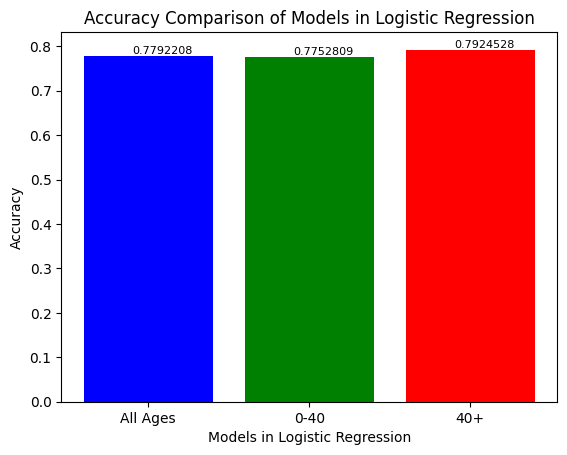

In [ ]:
accuracies = [accuracy, accuracy_lower_40, accuracy_higher_40]
models = ['All Ages', '0-40', '40+']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()

From the plot we can see that for the ages 40+ the model has better accuracy than the 0-40 ages for about 2.2%

#Change Regularization to L1

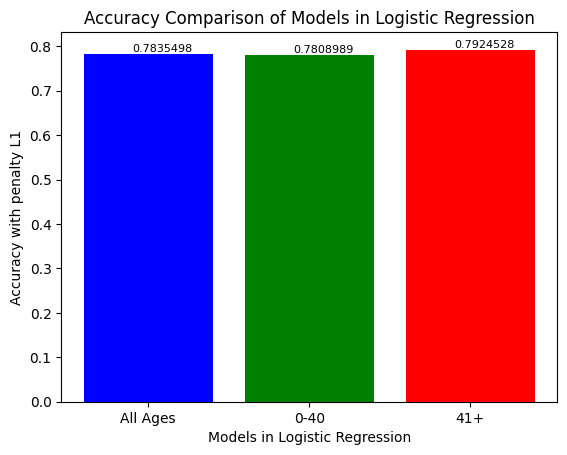

In [ ]:
regularization ='l1'

classifier = LogisticRegression(penalty= regularization, random_state = 0, solver = 'liblinear')

classifier.fit(x_train, y_train)

y_pred_l1 = classifier.predict (x_test)
y_pred_l1_higher_40 = classifier.predict (x_test_higher_40)
y_pred_l1_lower_40 = classifier.predict (x_test_lower_40)

accuracy_l1 = accuracy_score (y_test, y_pred_l1)
accuracy_l1_higher_40 = accuracy_score (y_test_higher_40, y_pred_l1_higher_40)
accuracy_l1_lower_40 = accuracy_score (y_test_lower_40, y_pred_l1_lower_40)


accuracies = [accuracy_l1, accuracy_l1_lower_40, accuracy_l1_higher_40]
models = ['All Ages', '0-40', '41+']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])



plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy with penalty L1')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()



We are observing here that the accuracy difference of ages 0-40 and 40+ has been approximately 1.2 %

#Change Regularization to None

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


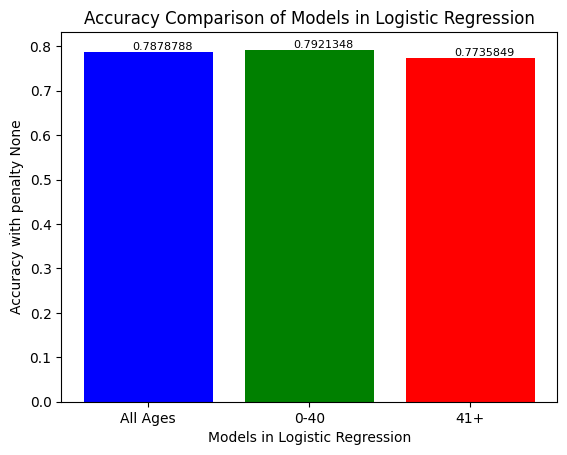

In [ ]:
regularization ='none'

classifier = LogisticRegression(penalty= regularization, random_state = 0)

classifier.fit(x_train, y_train)

y_pred_none = classifier.predict (x_test)
y_pred_none_higher_40 = classifier.predict (x_test_higher_40)
y_pred_none_lower_40 = classifier.predict (x_test_lower_40)

accuracy_none = accuracy_score (y_test, y_pred_none)
accuracy_none_higher_40 = accuracy_score (y_test_higher_40, y_pred_none_higher_40)
accuracy_none_lower_40 = accuracy_score (y_test_lower_40, y_pred_none_lower_40)


accuracies = [accuracy_none, accuracy_none_lower_40, accuracy_none_higher_40]
models = ['All Ages', '0-40', '41+']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])



plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy with penalty None')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()

Now we can observe that without penalty the accuracy of the ages 0-40 is higher than the accuracy of the 40+ by 2%

#Scatter the plot for the 3 penalties by age to compare which penalty gives better accuracy on each age index.

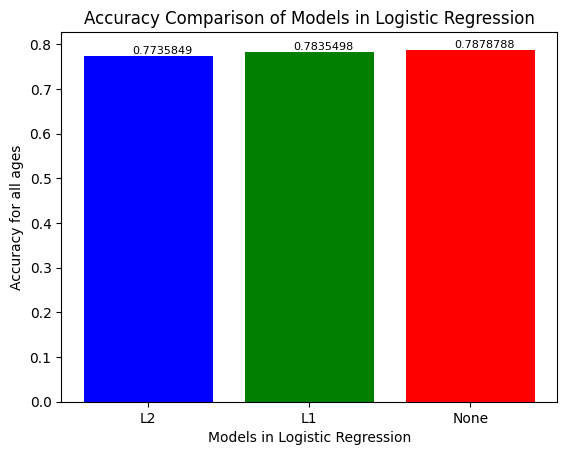

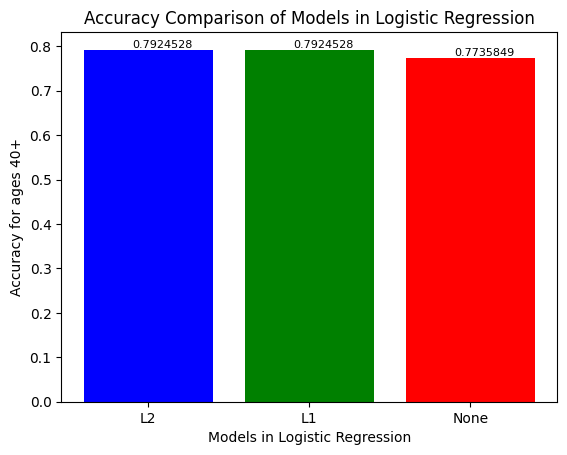

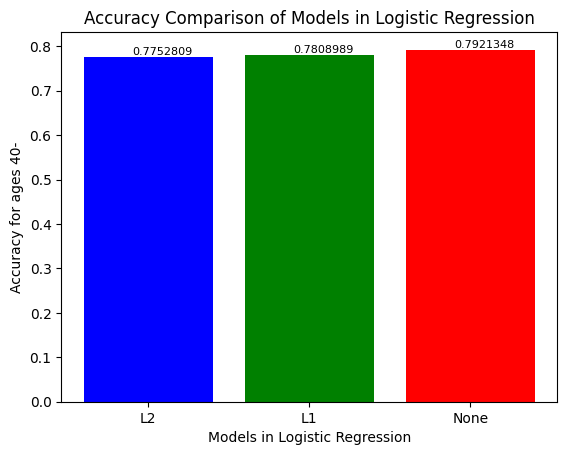

In [ ]:
accuracies = [accuracy, accuracy_l1, accuracy_none]
models = ['L2', 'L1', 'None']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy for all ages')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()


accuracies = [accuracy_higher_40, accuracy_l1_higher_40, accuracy_none_higher_40]
models = ['L2', 'L1', 'None']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy for ages 40+')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()

accuracies = [accuracy_lower_40, accuracy_l1_lower_40, accuracy_none_lower_40]
models = ['L2', 'L1', 'None']
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Models in Logistic Regression')
plt.ylabel('Accuracy for ages 40-')
plt.title('Accuracy Comparison of Models in Logistic Regression')

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, f'{accuracy:.7f}', fontsize=8)



# Show the plot
plt.show()

As we can see for all ages accuracy the best model is without penalty.

On the other hand for ages 40+ the best accuracy occurs with either l1 or l2.

For the best accuracy out of the 3 models for ages 0-40 the optimal penalty is none.







# Ex2. Linear Regression

# Select Corresponding Features for this task

In [ ]:
input_columns_lr = ["Age", "BMI","Pregnancies"]
target_column_lr = "BloodPressure"

# Split Dataset to x, y

In [ ]:
x_lr = df[input_columns_lr].to_numpy()
y_lr = df[target_column_lr].to_numpy()

# Split Dataset to Train-Test

In [ ]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr,y_lr, random_state=0, test_size = test_ratio)

# Compute BloodPressure Predictions

In [ ]:
classifier = LinearRegression ()

classifier.fit(x_train_lr, y_train_lr)

y_pred_lr = classifier.predict (x_test_lr)



# Measure MAE

In [ ]:
mae = mean_absolute_error(y_test_lr, y_pred_lr)
mae

10.923279710580168

#Check the mean and standard deviation of the y of the test set and train set

In [ ]:
test_std = np.std(y_test_lr)
train_std = np.std(y_train_lr)
test_mean = np.mean (y_test_lr)
train_mean = np.mean (y_train_lr)

print("Mean of train set:", train_mean)
print("Mean of test set:", test_mean)

print("Standard Deviation of train set:", train_std)
print("Standard Deviation of test set:", test_std)


Mean of train set: 69.66666666666667
Mean of test set: 67.80086580086581
Standard Deviation of train set: 19.446691366142627
Standard Deviation of test set: 19.036629060935017


We can see that the mean and standard deviation are relatively close. The difference is very small.

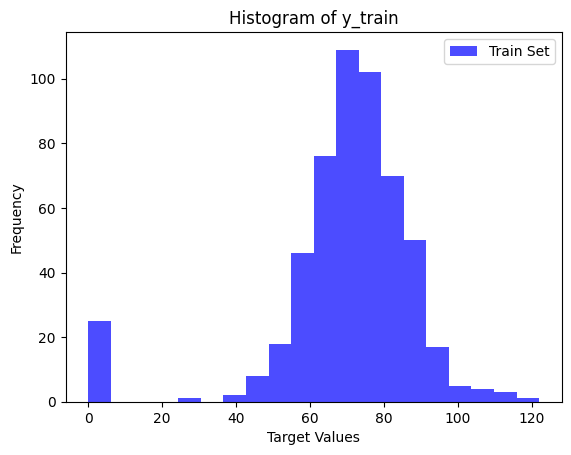

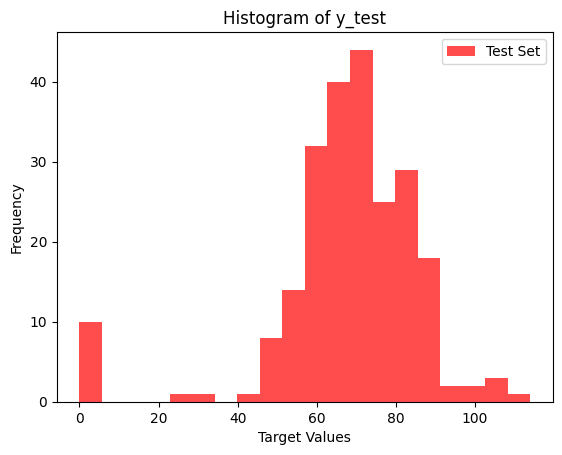

In [ ]:
plt.hist(y_train_lr, bins=20, label='Train Set', color='blue', alpha=0.7)


plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')
plt.legend()
plt.show()

plt.hist(y_test_lr, bins=20, label='Test Set', color='red', alpha=0.7)
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')
plt.legend()
plt.show()

As we can see here the distribution between the Train and the test set is approximately the same.



#Using Stohastic Gradient Descent Regresson

In [ ]:
sgd_regressor = SGDRegressor (loss='squared_error', penalty = 'l2', learning_rate='constant', eta0=0.01, tol=0.001,random_state =0)
sgd_regressor.fit(x_train_lr, y_train_lr)
y_pred_sgd = sgd_regressor.predict (x_test_lr)
mae_sgd = mean_absolute_error(y_test_lr, y_pred_sgd)

mae_sgd

3714793244517.3906

In [ ]:
sgd_regressor = SGDRegressor (loss='squared_error', penalty = 'l1', learning_rate='constant', eta0=0.01, tol=0.001,random_state =0)
sgd_regressor.fit(x_train_lr, y_train_lr)
y_pred_sgd_l1 = sgd_regressor.predict (x_test_lr)
mae_sgd_l1 = mean_absolute_error(y_test_lr, y_pred_sgd_l1)

mae_sgd_l1

7465925577113.516

In [ ]:
sgd_regressor = SGDRegressor (loss='squared_error', penalty = 'elasticnet', learning_rate='constant', eta0=0.01, tol=1e-3, random_state =0 )
sgd_regressor.fit(x_train_lr, y_train_lr)
y_pred_sgd_el = sgd_regressor.predict (x_test_lr)
mae_sgd_el = mean_absolute_error(y_test_lr, y_pred_sgd_el)

mae_sgd_el

14320399006720.775

In [ ]:
sgd_regressor = SGDRegressor (loss='squared_error', penalty = None, learning_rate='constant', eta0=0.01, tol=1e-3, random_state =0 )
sgd_regressor.fit(x_train_lr, y_train_lr)
y_pred_sgd_none = sgd_regressor.predict (x_test_lr)
mae_sgd_none = mean_absolute_error(y_test_lr, y_pred_sgd_none)

mae_sgd_none

19256283794345.633

In [ ]:
header = ["L2", "L1", "ElasticNet", "None"]
data = [mae_sgd, mae_sgd_l1, mae_sgd_el, mae_sgd_none]

# Print the headers
print(" | ".join(header))

# Print the data side by side
print(" | ".join(map(str, data)))

L2 | L1 | ElasticNet | None
3714793244517.3906 | 7465925577113.516 | 14320399006720.775 | 19256283794345.633
